In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read city data file into a DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read ride data into a Data Frame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Inspect city data for: null values, driver count data type, data points per city type

#Get not-null columns and rows
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [6]:
# count null coulumns
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#Get data types for each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#How many data points for each city type

#Get unique city types
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
sum(city_data_df["type"]=="Rural")

18

In [10]:
# Inspect ride DataFrame for nulls and check data types

# Get not-null rows and columns
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# count null coulumns
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# get data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# combine the data frames
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
#step 1: get the avg fare
#step 2: get the total rides
#step 3: get the avg driver count
#for efficiency, create separate data frames for each city type, then use to create series for each step

#create df for Urban cities
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
# urban_cities_df.head()

#create df for Suburban cities
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
# suburban_cities_df.head()

#create df for Rural cities
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
# rural_cities_df.head()

In [15]:
#put the number of rides for urban cities into a Series
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
# urban_ride_count.head()

#put the number of rides for suburban cities into a Series
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
# suburban_ride_count.head()

#put the number of rides for rural cities into a Series
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [16]:
#put the avg fare for urban cities into a Series
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

#put the avg fare for suburban cities into a Series
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
# suburban_avg_fare.head()

#put the avg fare for rural cities into a Series
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
# rural_avg_fare.head()

In [17]:
#put the avg urban driver count into a Series
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
# urban_driver_count

#put the avg suburban driver count into a Series
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
# suburban_driver_count

# put the avg rural driver count into a Series
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

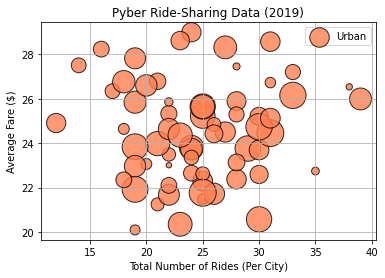

In [18]:
#create scatter plot where: x=num of rides/city, y=avg fare/city, size=avg drivers/city
#create individually then add to 1 chart

#build the scatter plots for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=(urban_driver_count*10), 
            color="coral", 
            edgecolor="black",
            linewidths=1,
            alpha=0.8, 
            label="Urban")

plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

plt.legend()

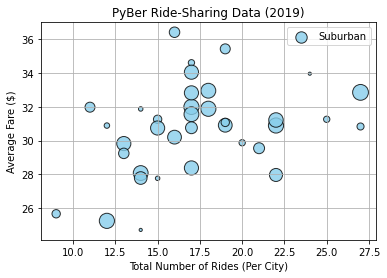

In [19]:
#build scatter plots for suburban cities
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=(10*suburban_driver_count),
           c="skyblue",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

plt.legend()

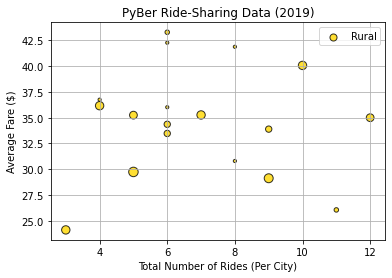

In [20]:
#build scatter plots for rural cities
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=(10*rural_driver_count),
           c="gold",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

plt.legend()

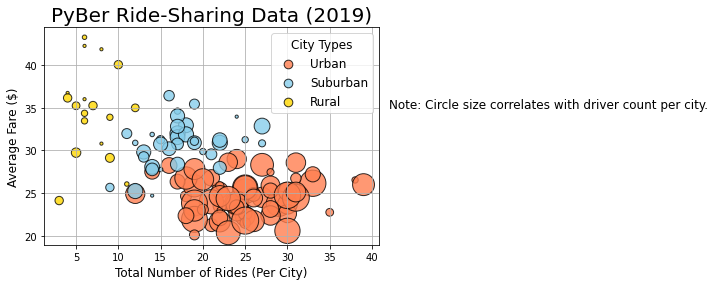

In [21]:
# Combine the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

In [24]:
# get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [25]:
# get summary statistics
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [26]:
# get summary statistics
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [28]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [29]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [30]:
round(urban_ride_count.mode(),2)

0    22
1    25
dtype: int64

In [31]:
round(suburban_ride_count.mode(),2)

0    17
dtype: int64

In [33]:
# Import NumPy or SciPy for if you're working in interpreter or vs code
import numpy as np
import scipy.stats as sts

In [36]:
# calculate the measures of central tendency for the ride count for urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for ride counts for urban trips is {mean_urban_ride_count:.2f}")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The mean for ride counts for urban trips is {median_urban_ride_count:.2f}")

mode_urban_ride_count = sts.mode(urban_ride_count) #only returns the mode that appears most frequently, additionally returs how many times the value appears in the data set
print(f"The mode for ride counts for urban trips is {mode_urban_ride_count}")


The mean for ride counts for urban trips is 24.62
The mean for ride counts for urban trips is 24.00
The mode for ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [38]:
# calculate the measures of central tendency for the ride count for suburban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for ride counts for suburban trips is {mean_suburban_ride_count:.2f}")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The mean for ride counts for suburban trips is {median_suburban_ride_count:.2f}")

mode_suburban_ride_count = sts.mode(suburban_ride_count) #only returns the mode that appears most frequently, additionally returs how many times the value appears in the data set
print(f"The mode for ride counts for suburban trips is {mode_suburban_ride_count}")


The mean for ride counts for suburban trips is 17.36
The mean for ride counts for suburban trips is 17.00
The mode for ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7]))


In [39]:
# calculate the measures of central tendency for the ride count for rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for ride counts for rural trips is {mean_rural_ride_count:.2f}")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The mean for ride counts for rural trips is {median_rural_ride_count:.2f}")

mode_rural_ride_count = sts.mode(rural_ride_count) #only returns the mode that appears most frequently, additionally returs how many times the value appears in the data set
print(f"The mode for ride counts for rural trips is {mode_rural_ride_count}")


The mean for ride counts for rural trips is 6.94
The mean for ride counts for rural trips is 6.00
The mode for ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [40]:
# Get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [43]:
# calc measures of central tendency for urban fares
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}")
      
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}")
      
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}")

The mean fare price for urban trips is $24.53
The median fare price for urban trips is $24.64
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5]))


In [44]:
# Get the fares for the suburban cities
suburban_fares = suburban_cities_df["fare"]

# calc measures of central tendency for suburban fares
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}")
      
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}")
      
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}")

The mean fare price for suburban trips is $30.97
The median fare price for suburban trips is $30.75
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3]))


In [45]:
# Get the fares for the rural cities
rural_fares = rural_cities_df["fare"]

# calc measures of central tendency for rural fares
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}")
      
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}")
      
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}")

The mean fare price for rural trips is $34.62
The median fare price for rural trips is $37.05
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2]))


In [46]:
#get the driver count data for the urban cities
urban_drivers=urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [47]:
#get the driver count data for the suburban cities
suburban_drivers=suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [48]:
#get the driver count data for the rural cities
rural_drivers=rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [52]:
mean_urban_drivers = np.mean(urban_drivers)
print(mean_urban_drivers)

median_urban_drivers = np.median(urban_drivers)
print(median_urban_drivers)

mode_urban_drivers = sts.mode(urban_drivers)
print(mode_urban_drivers)

36.67815384615385
37.0
ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [54]:
mean_suburban_drivers = np.mean(suburban_drivers)
print(mean_suburban_drivers)

median_suburban_drivers = np.median(suburban_drivers)
print(median_suburban_drivers)

mode_suburban_drivers = sts.mode(suburban_drivers)
print(mode_suburban_drivers)

13.712
16.0
ModeResult(mode=array([20], dtype=int64), count=array([79]))


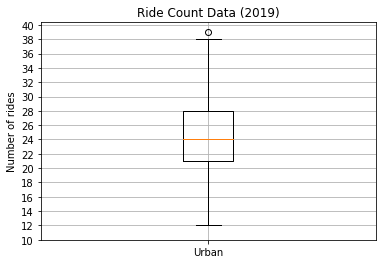

In [62]:
# create a box-and-whisker plot for urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

#add the title, label, and grid
ax.set_title("Urban Ride Count Data (2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

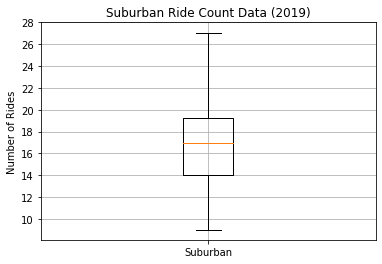

In [66]:
# create a box-and-whisker plot for suburban cities ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

#add the title, label, and grid
ax.set_title("Suburban Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,29,step=2.0))
ax.grid()
plt.show()

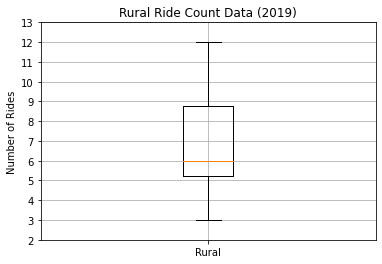

In [74]:
# create a box-and-whisker plot for Rural cities ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

#add the title, label, and grid
ax.set_title("Rural Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(2,14,step=1.0))
ax.grid()
plt.show()

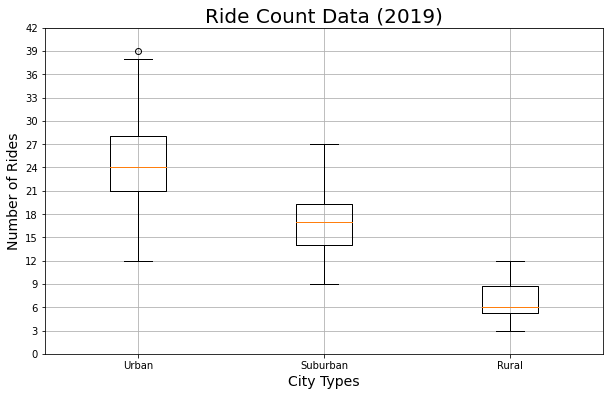

In [81]:
# Add all the plots to the same graph
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019)",fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()

plt.savefig("Fig2.png")
plt.show()

In [82]:
# Get the urban city outlier
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


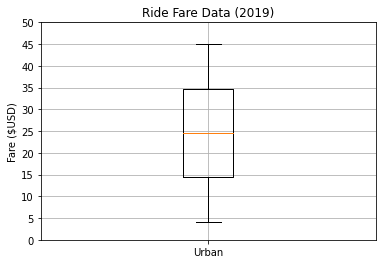

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [83]:
# create box and whisker plot for urban fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

#Format the graph
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

plt.show()

print("Summary Statistics")
urban_fares.describe()

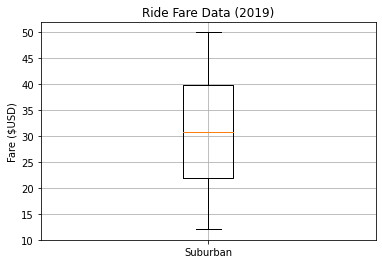

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [85]:
# create box and whisker plot for suburban fare data
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

#Format the graph
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(10, 51, step=5.0))
ax.grid()

plt.show()

print("Summary Statistics")
urban_fares.describe()

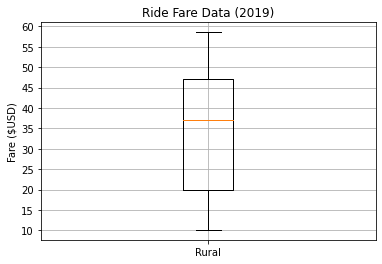

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [90]:
# create box and whisker plot for rural fare data
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

#Format the graph
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(10, 61, step=5.0))
ax.grid()

plt.show()

print("Summary Statistics")
urban_fares.describe()

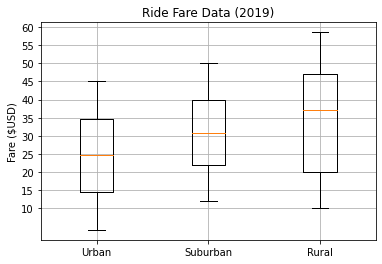

In [91]:
# create box and whisker plot for rural fare data
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots()
ax.boxplot([urban_fares, suburban_fares, rural_fares], labels=x_labels)

#Format the graph
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(10, 61, step=5.0))
ax.grid()

plt.savefig("Fig3.png")
plt.show()

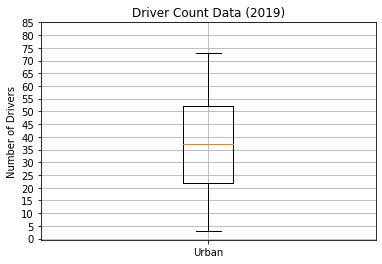

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [93]:
# Create urban driver count box and whisker plots
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

#Add formatting
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()

plt.show()

print("Summary Statistics")
urban_drivers.describe()

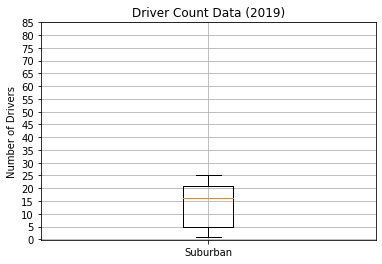

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [95]:
# Create suburban driver count box and whisker plots
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

#Add formatting
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()

plt.show()

print("Summary Statistics")
suburban_drivers.describe()

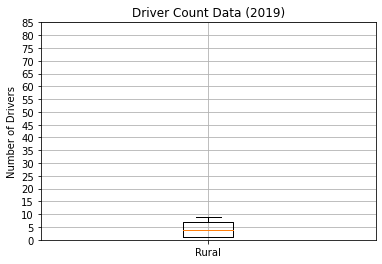

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [96]:
# Create rural driver count box and whisker plots
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

#Add formatting
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()

plt.show()

print("Summary Statistics")
rural_drivers.describe()

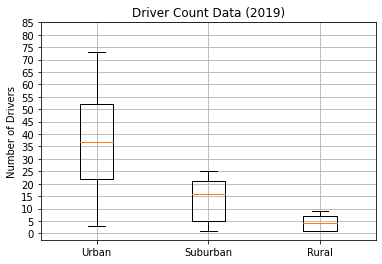

In [97]:
# Create rural driver count box and whisker plots
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots()
ax.boxplot([urban_drivers,suburban_drivers,rural_drivers], labels=x_labels)

#Add formatting
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()

plt.savefig("Fig4.png")
plt.show()